In [1]:
from read import read_features

import mne
from mne.externals.pymatreader import read_mat

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
labels = {
    'leve': 0,
    'moderada': 1,
    'severa': 2
}

def parse_y(y, lim_leve=0.075, lim_moderada=0.15):
    def classify(val):
        if (val <= lim_leve):
            return labels['leve']
        if (val <= lim_moderada):
            return labels['moderada']
        return labels['severa']
    
    len_y = len(y)
    classified = np.zeros(len_y, dtype=int)
    
    for i in range(len_y):
        classified[i] = classify(y[i])
        
    return classified

def map_2_colors(y, labels=labels):
    label_2_color = {
        0: 'green',
        1: 'orange',
        2: 'red'
    }
    
    cmap = []
    for i in range(len(y)):
        cmap.append(label_2_color[y[i]])
    return cmap

In [4]:
y_all = {}
y_all_class = {}
y_all_limits = {}

for experiment in features_files:
    key = f'{experiment[:-4]}'
    y = np.array(read_mat(f'./SEED-VIG/perclos_labels/{key}.mat')['perclos'])
    
    range_values = (np.max(y)-np.min(y))/100
    lim_leve = np.min(y)+range_values*12.5
    lim_moderada = np.min(y)+range_values*30
    
    y_all[key] = y
    y_all_limits[key] = [lim_leve, lim_moderada]
    y_all_class[key] = parse_y(y, lim_leve, lim_moderada)

5_20141108_noon


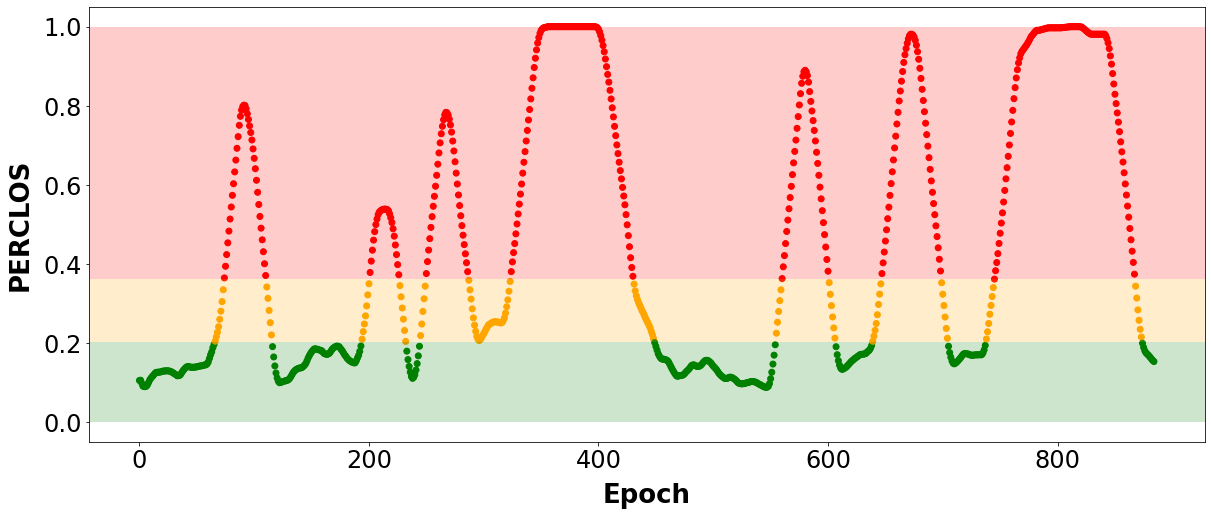

In [5]:
def plot_perclos_view(key):
    lim_leve, lim_moderada = y_all_limits[key]
    
    plt.figure(figsize=(20, 8))
    
    plt.axhspan(0, lim_leve, facecolor='green', alpha=0.2, label="Somnolencia leve")
    plt.axhspan(lim_leve, lim_moderada, facecolor='orange', alpha=0.2, label="Somnolencia moderada")
    plt.axhspan(lim_moderada, 1, facecolor='red', alpha=0.2, label="Somnolencia severa")
    
#     plt.plot(y_all[key], c='black', zorder=0)
    plt.scatter(range(len(y_all[key])), y_all[key], c=map_2_colors(y_all_class[key]))
#     plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 18)

    size_label = 26; plt.xlabel('Epoch', fontweight ='bold', labelpad = 10,fontsize = size_label); plt.ylabel('PERCLOS', fontweight ='bold', labelpad = 10,fontsize = size_label);
    size_ticks = 24; plt.xticks(fontsize=size_ticks); plt.yticks(fontsize=size_ticks);
#     size_legend = 20; plt.legend(loc='best', fontsize = size_legend)
    plt.savefig("E:/UNIVERSIDAD/TFG/TRABAJO/Images-Test/NOMBRE.pdf", bbox_inches='tight')


    plt.show()
    
for experiment in ['5_20141108_noon.csv']:
    key = f'{experiment[:-4]}'
    print(key)
    plot_perclos_view(key)

X shape: (885, 34), y shape: (885,)


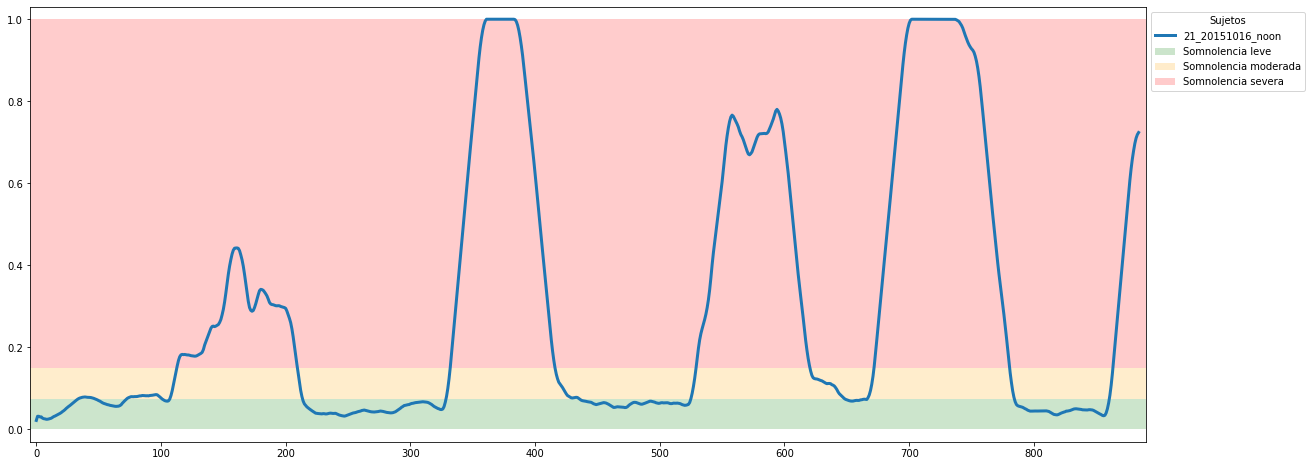

In [4]:
plt.figure(figsize=(20, 8))

lim_leve_moderada = 0.075
lim_moderada_severa = 0.15

plt.xlim(-5, 890)
plt.ylim(-0.03, 1.03)
plt.axhspan(0, lim_leve_moderada, facecolor='green', alpha=0.2, label="Somnolencia leve")
plt.axhspan(lim_leve_moderada, lim_moderada_severa, facecolor='orange', alpha=0.2, label="Somnolencia moderada")
plt.axhspan(lim_moderada_severa, 1, facecolor='red', alpha=0.2, label="Somnolencia severa")

#for i in range(len(features_files))
# De momento trabajo con esas dos porque son las que 'mejor' pinta tienen
for i in [22]:
    file = f'./features/{features_files[i]}'
    X, y = read_features(file, features=[0, 1])
    print(f'X shape: {X.shape}, y shape: {y.shape}')
    plt.plot(y, linewidth=3, label=features_files[i][:-4])
    
plt.legend(title='Sujetos', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()